# VINEYARD DISEASE DETECTION

This is the code to train the YOLOv12 model for disease detection in vines. The model is designed to classify vine leaves into three categories:

- Healthy
- Mildew
- Low Iron

This work is part of the ICAERUS Use Case 1: Crop Monitoring project.

To train the model, you need to download the dataset from [ZENODO ICAERUS VINEYARDS DATASET](https://zenodo.org/records/15090766).

Feel free to adjust the training settings according to your preferences, such as image size, batch size, number of epochs, and learning rate.

Happy training! 🚀






*Develop by [Noumena](https://noumena.io/)*

[> *More crop monitoring models here*](https://github.com/ICAERUS-EU/UC1_Crop_Monitoring)

[> *More ICAERUS datasets here*](https://zenodo.org/communities/icaerus_he/records?q=&l=list&p=1&s=10&sort=newest)

[> *ICAERUS PLATFORM*](https://www.platform.icaerus.eu/)

## Manage libraries

In [1]:
# Fix local time
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
# Install libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
# Import libraries
import os
import glob
from IPython import display
from IPython.display import Image
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [5]:
# Import data from colab
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


## Custom Training

In [6]:
# Check gpu
!nvidia-smi

Thu Mar 27 16:38:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# Load model
model = YOLO('/content/drive/MyDrive/yolov12n.pt')
dataset_path = "/content/drive/MyDrive/datasets3classes/data.yaml"

In [8]:
# Train yolov12 on custom dataset

model.train(
    data=dataset_path,
    epochs=300,
    batch=32,
    imgsz=640,
    device="cuda" # Change to 'cpu' if 'cuda' not available
)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolov12n.pt, data=/content/drive/MyDrive/datasets3classes/data.yaml, epochs=300, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

100%|██████████| 755k/755k [00:00<00:00, 138MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      2368  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2, 1, 2]          
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2, 1, 4]          
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 268MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/datasets3classes/train/labels.cache... 356 images, 0 backgrounds, 0 corrupt: 100%|██████████| 356/356 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/datasets3classes/valid/labels.cache... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      6.57G      2.513      3.595      2.554         35        640: 100%|██████████| 12/12 [02:43<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]

                   all        102        263    0.00361      0.441    0.00482    0.00142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      7.11G      1.866       3.28      1.993         30        640: 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        102        263    0.00814      0.497     0.0115    0.00267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      7.11G      1.605      2.811      1.772         17        640: 100%|██████████| 12/12 [00:08<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        102        263     0.0134      0.954      0.142     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      7.12G       1.56      2.446      1.763         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all        102        263      0.551      0.318        0.2     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      7.13G      1.492      2.222       1.66         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        102        263      0.478      0.231      0.126      0.049



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      7.14G       1.49      2.206      1.679         15        640: 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.522      0.389       0.22      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      7.16G      1.422      2.052      1.604         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.25s/it]

                   all        102        263      0.519      0.353      0.241      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      7.16G       1.42       1.98      1.585         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263       0.17      0.373       0.22     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      7.17G       1.49      1.909      1.616         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        102        263        0.3      0.544      0.392      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      7.17G      1.427      1.874      1.582         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263       0.16       0.34      0.183     0.0876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      7.19G       1.44      1.776      1.563         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all        102        263      0.257      0.373      0.236        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       7.2G      1.433      1.759      1.592         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.514      0.231      0.188     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300       7.2G       1.39      1.664      1.553         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        102        263      0.369       0.56      0.471      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300       7.2G      1.361      1.682      1.547         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.36s/it]

                   all        102        263      0.149      0.252      0.129     0.0537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300       7.2G      1.397      1.628      1.535         33        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.368      0.346       0.24     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300       7.2G      1.358      1.581      1.504         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        102        263      0.291      0.381      0.245      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300       7.2G      1.344      1.557      1.515         18        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        102        263      0.415      0.607      0.486      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300       7.2G      1.347      1.474      1.512         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        102        263      0.646      0.524      0.552       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300       7.2G      1.352      1.451        1.5         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.538      0.526      0.454      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300       7.2G      1.276      1.402      1.439         22        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263       0.54      0.614      0.561      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300       7.2G      1.333      1.492       1.53         11        640: 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        102        263      0.537      0.525      0.479      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300       7.2G      1.366      1.422      1.522         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        102        263      0.501      0.541      0.517      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300       7.2G      1.283      1.382      1.446         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263      0.472      0.548      0.473      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       7.2G      1.329       1.41      1.491         12        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        102        263      0.389      0.485      0.425       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300       7.2G      1.269      1.309      1.419         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all        102        263      0.526      0.473      0.429      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300       7.2G      1.286      1.311       1.44         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263      0.337      0.561      0.375       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300       7.2G      1.295       1.28      1.441         26        640: 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263      0.464      0.617      0.455      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300       7.2G      1.233      1.295        1.4         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263      0.536      0.608      0.502      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300       7.2G      1.273      1.306      1.446         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        102        263      0.614      0.639      0.615      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      7.21G      1.253      1.255      1.411         22        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        102        263      0.601      0.543      0.545      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      7.23G      1.242      1.234      1.407         25        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.576      0.609       0.59      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      7.23G      1.212       1.26      1.394         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        102        263      0.598      0.564      0.563      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      7.23G      1.196      1.247      1.376         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263       0.69      0.649       0.73      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      7.23G      1.264      1.213      1.432         16        640: 100%|██████████| 12/12 [00:08<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.558      0.684      0.636      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      7.23G      1.203      1.165      1.365         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        102        263      0.524      0.708      0.622      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      7.23G      1.214      1.169      1.367         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.749      0.626      0.712      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      7.23G      1.177      1.123      1.359         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263      0.555      0.637      0.627      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      7.23G      1.258       1.18      1.415         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        102        263      0.692      0.687       0.69      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      7.23G       1.21      1.176      1.376         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        102        263      0.506      0.703       0.56      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      7.23G      1.175      1.126      1.355         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        102        263      0.553      0.565      0.548      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      7.23G      1.217      1.127      1.373         19        640: 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        102        263      0.392      0.731      0.419      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      7.23G      1.183       1.12      1.355         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        102        263       0.43      0.561      0.508      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      7.23G      1.166      1.122      1.337         19        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263      0.633      0.657      0.657      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      7.23G      1.162      1.097      1.336         16        640: 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263      0.687      0.645      0.697      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      7.23G      1.152      1.097      1.353         14        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        102        263      0.732        0.6      0.656      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      7.23G      1.185      1.091      1.359         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        102        263      0.679      0.639      0.721      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      7.23G      1.153      1.048      1.346         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.643      0.687      0.647      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      7.23G      1.166      1.083      1.339         25        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.574       0.61      0.601      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      7.23G      1.141      1.053      1.328         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        102        263      0.657       0.49      0.556      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      7.23G      1.123      1.005      1.305         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        102        263      0.733      0.718      0.774      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      7.23G       1.13      1.066      1.325         10        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all        102        263      0.489      0.564       0.53      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      7.23G      1.111       1.03      1.303         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        102        263       0.45      0.615      0.567      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      7.23G       1.17      1.028      1.376         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

                   all        102        263      0.686      0.613      0.686      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      7.23G      1.128      1.069      1.315         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263      0.768      0.659      0.738      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      7.23G      1.106     0.9702      1.281         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        102        263      0.722      0.726      0.764      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      7.23G      1.097     0.9794      1.301         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all        102        263      0.679      0.774      0.751      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      7.23G      1.148      1.088      1.346         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.739      0.707      0.753       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      7.23G      1.142      1.083      1.342         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.495      0.575      0.515      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      7.23G      1.087      1.001      1.302         23        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        102        263        0.6      0.686      0.649        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      7.23G       1.11      1.006      1.322         27        640: 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        102        263      0.716       0.58      0.672      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      7.23G      1.083     0.9895      1.304         21        640: 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.578        0.5      0.498      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      7.23G      1.129     0.9768      1.339         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263      0.633      0.698      0.655      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      7.23G      1.041     0.9043      1.272         26        640: 100%|██████████| 12/12 [00:08<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.584      0.599      0.587      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      7.23G      1.071     0.9244       1.29         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.643      0.691      0.689      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      7.23G      1.111     0.9552      1.307         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        102        263      0.665      0.644      0.704      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      7.23G      1.042     0.9374      1.279         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        102        263      0.735      0.662      0.764       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      7.23G      1.059     0.9186      1.279         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.703      0.652        0.7      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      7.23G      1.067     0.9492      1.284         10        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        102        263      0.747      0.734      0.756      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      7.23G      1.097      0.961      1.289         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.677      0.776      0.731      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      7.23G      1.074     0.8983      1.279         23        640: 100%|██████████| 12/12 [00:08<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        102        263      0.432      0.692      0.509       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      7.23G      1.072     0.9279      1.278         30        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        102        263      0.576      0.607      0.583      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      7.23G      1.059     0.9124      1.263         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        102        263       0.57      0.641      0.617      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      7.23G      1.026     0.8799      1.245         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263      0.597      0.594      0.614      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      7.23G      1.006     0.8788      1.245         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        102        263      0.762      0.657      0.719      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      7.23G      1.044     0.8762      1.272         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263      0.729      0.714      0.762      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      7.23G      1.037      0.889      1.248         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263      0.796      0.693      0.813      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      7.23G      1.041     0.8839      1.262         18        640: 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.633      0.661      0.633      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      7.23G      1.076     0.9134      1.281         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        102        263      0.667      0.625       0.66      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      7.23G      1.045      0.863      1.271         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        102        263      0.616      0.678      0.611      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      7.23G       1.02      0.859      1.237         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        102        263      0.683      0.771      0.755      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      7.23G      1.023     0.8621      1.237         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        102        263      0.628      0.672      0.666      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      7.23G     0.9973     0.8533      1.229         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all        102        263      0.733      0.661      0.725      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      7.23G      1.027     0.8412      1.253         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        102        263      0.789      0.766      0.818      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      7.23G      1.022     0.8237      1.243         15        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        102        263      0.728      0.769      0.772      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      7.23G      1.022      0.823      1.261         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        102        263      0.697      0.775      0.772       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      7.23G      1.016     0.8627       1.24         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.688      0.651      0.712      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      7.23G      1.014     0.8904      1.278         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        102        263      0.684      0.618       0.69      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      7.23G     0.9688     0.8124       1.22         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        102        263      0.737      0.678      0.751      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      7.23G      1.021     0.8619      1.255         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all        102        263      0.724      0.654      0.685      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      7.23G     0.9893     0.8431       1.23         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        102        263       0.72      0.628      0.669      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      7.23G     0.9852     0.8061      1.231         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        102        263      0.613      0.746      0.713      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      7.23G      1.025      0.861       1.25         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        102        263      0.685      0.753      0.786      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      7.23G      0.969     0.7565      1.209         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        102        263      0.772      0.688      0.777        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      7.23G     0.9897     0.8018      1.242         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.761      0.675      0.766      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      7.23G     0.9763     0.8303      1.216         30        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        102        263      0.582      0.565      0.553      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      7.23G     0.9539     0.8249      1.213         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        102        263      0.653       0.65      0.665       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      7.23G     0.9613     0.7952      1.205         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all        102        263      0.605      0.551      0.535      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      7.23G     0.9308     0.7732      1.205         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        102        263      0.616      0.768      0.703      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      7.23G     0.9254     0.7977      1.193         29        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263      0.543      0.693      0.618      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      7.23G     0.9703     0.7802      1.227         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        102        263      0.609      0.692      0.692      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      7.23G     0.9792      0.831      1.255         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        102        263      0.728       0.81      0.794      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      7.23G     0.9873     0.8521      1.236         17        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263      0.806      0.731      0.772      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      7.23G     0.9428     0.7743      1.212         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        102        263      0.635      0.783      0.697      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      7.23G     0.9574     0.7624      1.199         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.568      0.741      0.679      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      7.23G      0.945      0.774      1.209         29        640: 100%|██████████| 12/12 [00:08<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.741      0.725      0.754       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      7.23G     0.9662     0.7708      1.226         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        102        263      0.753      0.756        0.8      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      7.23G     0.9335      0.732      1.193         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        102        263      0.717      0.753      0.789        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      7.23G      0.933     0.7769        1.2         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.545      0.762      0.671      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      7.23G     0.9681     0.7701      1.213         28        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        102        263      0.667      0.762      0.753      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      7.23G     0.9238     0.7362      1.204         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        102        263      0.784      0.674       0.79      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      7.23G     0.9167     0.7526      1.183         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        102        263      0.741      0.713      0.774       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      7.23G     0.9283     0.7495      1.185         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.747      0.865       0.85      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      7.23G     0.9027     0.7401      1.173         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        102        263      0.852      0.735      0.816      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      7.23G     0.9211     0.7615      1.186         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        102        263      0.875      0.711      0.826      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      7.23G     0.8878     0.6898      1.165         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        102        263      0.837      0.762      0.871       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      7.23G     0.9288     0.7393      1.181         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        102        263      0.824      0.771      0.864      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      7.23G     0.8987     0.7291      1.178         30        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        102        263      0.793      0.768      0.854      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      7.23G     0.8978     0.7234      1.175         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        102        263      0.741      0.692      0.763      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      7.23G     0.9615     0.7438      1.198         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.684      0.646      0.673      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      7.23G     0.9011     0.7437      1.181         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        102        263      0.633      0.771       0.73      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      7.23G     0.9317     0.6899      1.185         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        102        263      0.657      0.588        0.6      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      7.23G     0.8876     0.7021      1.172         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.733      0.671      0.768      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      7.23G     0.9331     0.7286      1.198         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        102        263      0.737       0.84      0.834      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      7.23G      0.911     0.7469      1.199         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        102        263      0.695      0.774      0.784      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      7.23G     0.8838     0.7067      1.155         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        102        263      0.757      0.725      0.797      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      7.23G     0.8916     0.6863      1.171         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.774      0.704       0.78      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      7.23G     0.8649     0.6857      1.169         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        102        263      0.761      0.652      0.767      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      7.23G     0.9489     0.7373      1.195         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]

                   all        102        263      0.741      0.676      0.761      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      7.23G     0.8737     0.6883      1.161         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.665      0.685       0.75      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      7.23G     0.8807     0.6842      1.151         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        102        263      0.682       0.76      0.722       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      7.23G     0.8699     0.6932      1.158         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.674      0.675      0.713      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      7.23G     0.8717     0.6614      1.155         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263      0.585      0.707      0.648      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      7.23G     0.8645     0.6692      1.157         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.702      0.638      0.668      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      7.23G     0.8468     0.6567      1.147         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        102        263       0.67      0.689      0.678      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      7.23G     0.8632     0.6521      1.147         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        102        263      0.609      0.611      0.555      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      7.23G     0.8292     0.6735      1.154         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        102        263      0.704      0.741      0.745      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      7.23G     0.8448     0.6611      1.151         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263       0.63       0.68      0.636      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      7.23G     0.8555      0.649      1.156         25        640: 100%|██████████| 12/12 [00:08<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        102        263      0.676      0.772       0.75      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      7.23G     0.8535     0.6357       1.15         26        640: 100%|██████████| 12/12 [00:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.662      0.702      0.696      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      7.23G     0.8516      0.659      1.137         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.697      0.703      0.749      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      7.23G     0.8418     0.6679      1.145         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        102        263      0.788      0.752      0.835      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      7.23G      0.842     0.6457       1.15         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        102        263      0.724      0.818      0.831      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      7.23G     0.8554     0.6731      1.159         12        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        102        263      0.751       0.73      0.799      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      7.23G     0.8167     0.6114      1.142         11        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        102        263      0.786      0.768      0.825       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      7.23G     0.9074     0.7249      1.169         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        102        263      0.711       0.66      0.746      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      7.23G     0.8171     0.6054      1.117         21        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        102        263      0.709      0.672      0.747      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      7.23G      0.857     0.6609      1.149         12        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        102        263      0.648      0.697      0.695      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      7.23G     0.8188     0.6375      1.118         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        102        263      0.647      0.718      0.683      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      7.23G     0.8151     0.6363      1.127         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263      0.616      0.712      0.687      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      7.23G     0.8526     0.6504      1.144         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263      0.687      0.732      0.718      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      7.23G     0.8387     0.6309      1.132         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.725       0.74      0.732      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      7.23G      0.802     0.6226      1.115         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        102        263      0.655      0.723      0.758      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      7.23G     0.8186     0.6069       1.12         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        102        263      0.673      0.611      0.663      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      7.23G     0.8105     0.5987      1.117         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        102        263      0.701      0.684      0.711      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      7.23G      0.799     0.6442      1.123         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all        102        263      0.745      0.673      0.727      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      7.23G     0.8399     0.6673      1.144         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        102        263      0.777      0.705      0.764      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      7.23G      0.812     0.6246      1.132         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.625      0.623      0.618      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      7.23G     0.8076      0.589      1.113         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.701      0.625      0.668      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      7.23G     0.8195     0.6138      1.126         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        102        263      0.733      0.597      0.624      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      7.23G     0.8132      0.599      1.121         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.812      0.712      0.802      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      7.23G     0.8057      0.591      1.125         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all        102        263      0.826      0.739      0.842      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      7.23G     0.7713      0.584      1.089         29        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        102        263      0.809      0.778      0.835       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      7.23G     0.7952     0.6042      1.114         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all        102        263      0.826      0.737       0.84      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      7.23G     0.8056     0.5984      1.136         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        102        263      0.706      0.772      0.813      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      7.23G     0.8038     0.5974      1.113         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        102        263      0.755        0.8      0.845      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      7.23G     0.8096     0.6195      1.138         14        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263      0.757      0.782      0.834      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      7.23G     0.7643     0.5547      1.085         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        102        263      0.678      0.714      0.695      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      7.23G     0.7865     0.5786      1.102         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all        102        263      0.717      0.673      0.745      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      7.23G     0.8028     0.6212      1.126         22        640: 100%|██████████| 12/12 [00:08<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        102        263      0.787      0.642      0.749       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      7.23G      0.776     0.5856      1.104         30        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        102        263      0.776      0.723      0.801      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      7.23G      0.797     0.5821      1.113         12        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        102        263      0.704      0.738      0.781       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      7.23G     0.7752      0.602      1.099         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        102        263      0.692      0.782      0.788      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      7.23G     0.7683     0.5595      1.096         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        102        263      0.756      0.766      0.782       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      7.23G     0.7959     0.5914      1.117         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263      0.678      0.699      0.742      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      7.23G     0.7712     0.5456      1.108         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.479      0.672      0.592       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      7.23G     0.7732     0.5986      1.088         33        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all        102        263      0.565        0.7      0.621      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      7.23G     0.7746     0.5812      1.114         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        102        263      0.679      0.653      0.681      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      7.23G     0.7727     0.5801       1.09         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        102        263      0.685      0.674      0.717      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      7.23G     0.7973     0.6275      1.116         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263      0.744      0.687      0.735      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      7.23G     0.7813     0.6009      1.099         18        640: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        102        263      0.796      0.786      0.841      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      7.23G     0.7328       0.56      1.084         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        102        263      0.779      0.728      0.752      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      7.23G     0.7488     0.5359      1.088         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263      0.718      0.707      0.729      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      7.23G     0.7362     0.5318      1.081         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263      0.636      0.702      0.693      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      7.23G     0.7521     0.5414      1.075         15        640: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263        0.7       0.73      0.735      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      7.23G     0.7069     0.5311      1.061         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        102        263      0.772      0.715       0.81      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      7.23G     0.7435     0.5209      1.075         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.735      0.771      0.815      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      7.23G     0.7403      0.549      1.085         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        102        263      0.797      0.751      0.849      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      7.23G     0.7161     0.5275      1.071         15        640: 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.812      0.736      0.839      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      7.23G     0.7195     0.5214      1.067         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        102        263      0.775      0.706      0.794      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      7.23G     0.7372     0.5269      1.079         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        102        263      0.724      0.719      0.747      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      7.23G     0.7287     0.5412      1.067         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        102        263      0.792      0.733      0.798      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      7.23G     0.7289     0.5508      1.083         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        102        263      0.781       0.82        0.8      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      7.23G     0.7381     0.5336      1.084         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.748      0.766      0.801      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      7.23G     0.7402     0.5595      1.083         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        102        263      0.839      0.707      0.792      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      7.23G     0.7324     0.5454      1.077         16        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all        102        263      0.742      0.798      0.807      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      7.23G     0.7337     0.5287      1.061         30        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        102        263      0.817      0.711      0.839      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      7.23G     0.7507     0.6484      1.137          8        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263      0.784      0.756      0.832      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      7.23G      0.731     0.5458       1.09         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        102        263      0.787      0.758      0.805      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      7.23G     0.6961     0.5148      1.059         18        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263      0.739      0.715      0.794      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      7.23G     0.7078     0.5202      1.077         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        102        263      0.796      0.736      0.821      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      7.23G     0.7292     0.5103      1.091         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        102        263      0.776       0.76       0.81      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      7.23G     0.7058     0.5241       1.07         19        640: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.804      0.736      0.765      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      7.23G     0.7471     0.5627      1.104         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all        102        263      0.775       0.76      0.802      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      7.23G     0.7082     0.5339       1.08         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263      0.682      0.746      0.733      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      7.23G     0.6884     0.5093      1.043         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.798      0.726      0.754      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      7.23G      0.725     0.5245      1.067         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        102        263      0.765      0.733       0.76      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      7.23G     0.7009     0.5049      1.073          9        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        102        263      0.757      0.728      0.745      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      7.23G     0.7056     0.5204      1.066         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        102        263      0.815      0.709       0.78      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      7.23G     0.7128     0.5046      1.066         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        102        263      0.815      0.792      0.833      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      7.23G     0.6652     0.4905      1.057         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        102        263      0.887      0.743      0.862       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      7.23G     0.7054     0.5198      1.064         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.818      0.759      0.818      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      7.23G     0.7534     0.5717      1.127         10        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.809      0.734      0.802      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      7.23G     0.7031     0.5164      1.062         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        102        263      0.798      0.711      0.777      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      7.23G      0.697     0.5116      1.066         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263       0.84      0.631       0.71      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      7.23G     0.6688     0.5115      1.057         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        102        263      0.811      0.699      0.763      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      7.23G     0.7048     0.5163      1.058         31        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.792      0.756      0.796      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      7.23G     0.6984     0.5192      1.066         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        102        263      0.819      0.735      0.828      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      7.23G     0.6777     0.4936      1.049         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        102        263      0.855       0.73      0.841      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      7.23G     0.6657     0.4883      1.056         12        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        102        263      0.714        0.7      0.755      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      7.23G     0.6992     0.5246      1.056         27        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        102        263       0.76      0.712       0.78      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      7.23G     0.6604     0.4622      1.034         26        640: 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        102        263      0.727      0.685      0.778      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      7.23G     0.6725     0.4807       1.05         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all        102        263      0.716      0.664      0.746      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      7.23G     0.6838     0.4818      1.043         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        102        263      0.803      0.722      0.792      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      7.23G     0.6515     0.4876      1.046         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        102        263      0.769      0.712      0.786      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      7.23G     0.6867     0.4962       1.05         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        102        263      0.845      0.776      0.851      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      7.23G     0.6655     0.5239      1.048         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263      0.826      0.748      0.845      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      7.23G     0.6906     0.4799      1.064         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        102        263       0.79      0.818      0.841      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      7.23G     0.6624     0.4978      1.054         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263      0.841      0.798      0.863      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      7.23G     0.6729     0.4739      1.055         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        102        263      0.812      0.783      0.845      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      7.23G     0.6582     0.4816      1.041         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        102        263      0.746      0.636      0.732      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      7.23G     0.6312     0.4529      1.017         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        102        263      0.781       0.73      0.785      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      7.23G     0.6747     0.4987      1.053         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.784      0.759      0.826      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      7.23G      0.661     0.4887      1.063         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all        102        263      0.827      0.745      0.812      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      7.23G     0.6612     0.4938      1.049         22        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        102        263      0.852      0.747      0.809      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      7.23G      0.668      0.494       1.05         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263      0.851      0.768       0.84      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      7.23G     0.6461     0.4668      1.032         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        102        263      0.821      0.786      0.842      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      7.23G     0.6211     0.4464      1.021         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.798      0.812      0.853      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      7.23G     0.6654     0.4732      1.033         18        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all        102        263      0.808      0.797      0.848      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      7.23G     0.6117     0.4297      1.017         19        640: 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        102        263      0.882      0.748      0.848      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      7.23G     0.6243     0.4512      1.028         17        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        102        263      0.836      0.744       0.82      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      7.23G     0.6098     0.4508      1.021         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        102        263       0.85      0.769      0.837      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      7.23G     0.6615     0.4702      1.042         17        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263      0.777      0.766      0.797      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      7.23G     0.6262     0.4369      1.026         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        102        263      0.731      0.709      0.745      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      7.23G     0.6344     0.4563      1.047         16        640: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263       0.81      0.707      0.802      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      7.23G     0.6246      0.456      1.038         13        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        102        263      0.818      0.812      0.852      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      7.23G     0.6263     0.4543      1.025         23        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        102        263      0.765      0.783      0.844      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      7.23G     0.6425     0.4758      1.053         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        102        263      0.756      0.802      0.801      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      7.23G      0.613      0.442      1.023         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        102        263      0.776      0.723      0.781       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      7.23G      0.649     0.4719      1.032         28        640: 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.799      0.796      0.853      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      7.23G     0.6032     0.4502      1.023         17        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        102        263      0.822      0.739      0.822      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      7.23G     0.6617     0.4855      1.044         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        102        263      0.809      0.731      0.837      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      7.23G     0.5987     0.4415      1.011         23        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263      0.749      0.714      0.775      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      7.23G     0.6488     0.4796      1.026         33        640: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.822      0.638      0.777      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      7.23G     0.6229     0.4371      1.014         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        102        263      0.716      0.773      0.779      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      7.23G     0.6423     0.4682       1.04         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        102        263      0.793      0.719      0.817      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      7.23G     0.5941     0.4246       1.02         20        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        102        263      0.803      0.725      0.822      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      7.23G     0.5959     0.4325      1.025         17        640: 100%|██████████| 12/12 [00:08<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263      0.805      0.777      0.848      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      7.23G      0.599     0.4377      1.013         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        102        263      0.834      0.761      0.848       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      7.23G     0.5849     0.4474       1.01         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        102        263      0.845      0.774      0.864      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      7.23G     0.6233      0.451      1.029         22        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        102        263       0.81      0.775      0.857      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      7.23G     0.5999     0.4302      1.025         15        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all        102        263      0.785      0.768      0.836      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      7.23G     0.6187     0.4492      1.023         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        102        263      0.755      0.732      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      7.23G     0.5844     0.4315      1.008         12        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263       0.73      0.722      0.783      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      7.23G     0.5813     0.4183      1.013         13        640: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        102        263      0.684      0.769      0.766      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      7.23G     0.6054     0.4287       1.01         27        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263      0.809      0.724      0.797      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      7.23G      0.581     0.4156      1.012         19        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        102        263      0.763      0.779      0.804      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      7.23G     0.6207     0.4382      1.008         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        102        263      0.761      0.759      0.813       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      7.23G     0.5964     0.4194      1.002         25        640: 100%|██████████| 12/12 [00:08<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263      0.805      0.701      0.818      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      7.23G     0.6058     0.4275      1.007         26        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all        102        263       0.82      0.708      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      7.23G     0.5774     0.4027     0.9951         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        102        263      0.825      0.716       0.82      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      7.23G     0.5913     0.4328      1.006         22        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all        102        263      0.844      0.758      0.834      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      7.23G     0.6187     0.4473      1.021         21        640: 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263      0.829       0.76      0.849      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      7.23G     0.6181     0.4528      1.034         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        102        263      0.836       0.76      0.844      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      7.23G     0.5836     0.4098      1.011         12        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        102        263       0.85      0.741       0.84      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      7.23G      0.572     0.4265      1.014         20        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263      0.833      0.731      0.829      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      7.23G     0.6023     0.4339      1.036         11        640: 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.849      0.707       0.83      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      7.23G     0.5955      0.418      1.018         25        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        102        263      0.812       0.78      0.846      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      7.23G     0.5716     0.4125     0.9981         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        102        263      0.836      0.773      0.851      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      7.23G     0.5771     0.4157      1.008         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all        102        263      0.795      0.766      0.852      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      7.23G     0.5766     0.4437     0.9945         28        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all        102        263      0.817       0.75      0.851      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      7.23G     0.5848     0.3917     0.9961         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        102        263      0.807      0.774      0.829      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      7.23G     0.5686     0.4135      1.002         24        640: 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        102        263      0.786      0.776      0.825      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      7.23G      0.576     0.4309      1.022         18        640: 100%|██████████| 12/12 [00:08<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        102        263       0.77      0.802      0.825      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      7.23G     0.5787     0.4087     0.9988         21        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        102        263      0.797      0.777      0.832      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      7.23G     0.5678     0.4076       1.01         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        102        263      0.823      0.779       0.85      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      7.23G      0.559     0.3978      1.006         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        102        263       0.82      0.804      0.846      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      7.23G     0.5535     0.4289     0.9882         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        102        263      0.819      0.771      0.837      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      7.23G     0.5729     0.4613      1.014         12        640: 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        102        263      0.805      0.773      0.846       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      7.23G     0.5766     0.4754      1.023         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all        102        263      0.827      0.765      0.857      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      7.23G     0.5624     0.3927      1.002         16        640: 100%|██████████| 12/12 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        102        263      0.812      0.785      0.862      0.574


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      7.23G     0.4915     0.3189      0.966         13        640: 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        102        263      0.834      0.769      0.858      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      7.23G     0.4927     0.3286      0.968         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        102        263      0.786      0.766      0.841      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      7.23G     0.4966     0.2903      0.952         13        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        102        263      0.789      0.764      0.819      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      7.23G     0.4879     0.2932     0.9623         10        640: 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        102        263      0.793      0.773      0.814      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      7.23G     0.4416     0.2624     0.9473         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        102        263      0.815      0.777      0.809      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      7.23G     0.4429     0.2678     0.9347          7        640: 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        102        263      0.811       0.76      0.812      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      7.23G     0.4534     0.2717     0.9414         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        102        263      0.789      0.754      0.805      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      7.23G     0.4767     0.3064     0.9485         15        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        102        263      0.811      0.758      0.805      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      7.23G     0.4415     0.2815     0.9518         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        102        263      0.784       0.78      0.807      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      7.23G      0.435     0.2569     0.9288         11        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        102        263      0.779       0.78      0.806      0.528



300 epochs completed in 0.903 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,527,361 parameters, 0 gradients, 5.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


                   all        102        263      0.887      0.742      0.863      0.581
               healthy         80        195      0.879      0.782      0.889      0.567
              low-iron         16         30      0.797      0.733      0.831      0.598
                mildew         14         38      0.984      0.711      0.867      0.577
Speed: 0.2ms preprocess, 7.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e76bbd5ffd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [9]:
# Download best model
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Training info
!cat /content/runs/detect/train/results.csv | head -10

epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
1,174.846,2.51261,3.5945,2.5535,0.00361,0.44058,0.00482,0.00142,2.59142,3.31504,2.77509,0.00015719,0.00015719,0.00015719
2,186.811,1.86568,3.27955,1.99267,0.00814,0.49667,0.01145,0.00267,3.07001,3.35094,3.00443,0.000327585,0.000327585,0.000327585
3,198.591,1.60469,2.81092,1.772,0.01342,0.95448,0.14241,0.05294,1.53037,2.97217,1.88958,0.000496849,0.000496849,0.000496849
4,208.988,1.56037,2.44569,1.76286,0.55053,0.31838,0.19984,0.08916,1.62365,2.38084,2.13389,0.000664981,0.000664981,0.000664981
5,219.255,1.49159,2.22189,1.65954,0.47799,0.23077,0.12637,0.04899,1.76876,2.63639,2.36906,0.000831981,0.000831981,0.000831981
6,229.751,1.48959,2.20556,1.67938,0.52218,0.38889,0.22025,0.10888,1.56564,2.466,2.11623,0.000997849,0.000997849,0.000997849
7,240.418,1.42236,2.05223,1.60362,0.51947,0.35299,0.24132,0.1

## Test custom model

In [11]:
# Load new model and evaluate
new_model = YOLO("/content/runs/detect/train/weights/best.pt")
test_results = new_model.val(data=dataset_path)

Ultralytics 8.3.97 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,527,361 parameters, 0 gradients, 5.9 GFLOPs


val: Scanning /content/drive/MyDrive/datasets3classes/valid/labels.cache... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


                   all        102        263      0.885      0.743      0.862      0.581
               healthy         80        195      0.874      0.784      0.889      0.566
              low-iron         16         30      0.798      0.733      0.831      0.597
                mildew         14         38      0.984      0.711      0.867      0.579
Speed: 10.2ms preprocess, 9.8ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val


### Inference with custom model

/content/runs/detect/val/val_batch2_pred.jpg


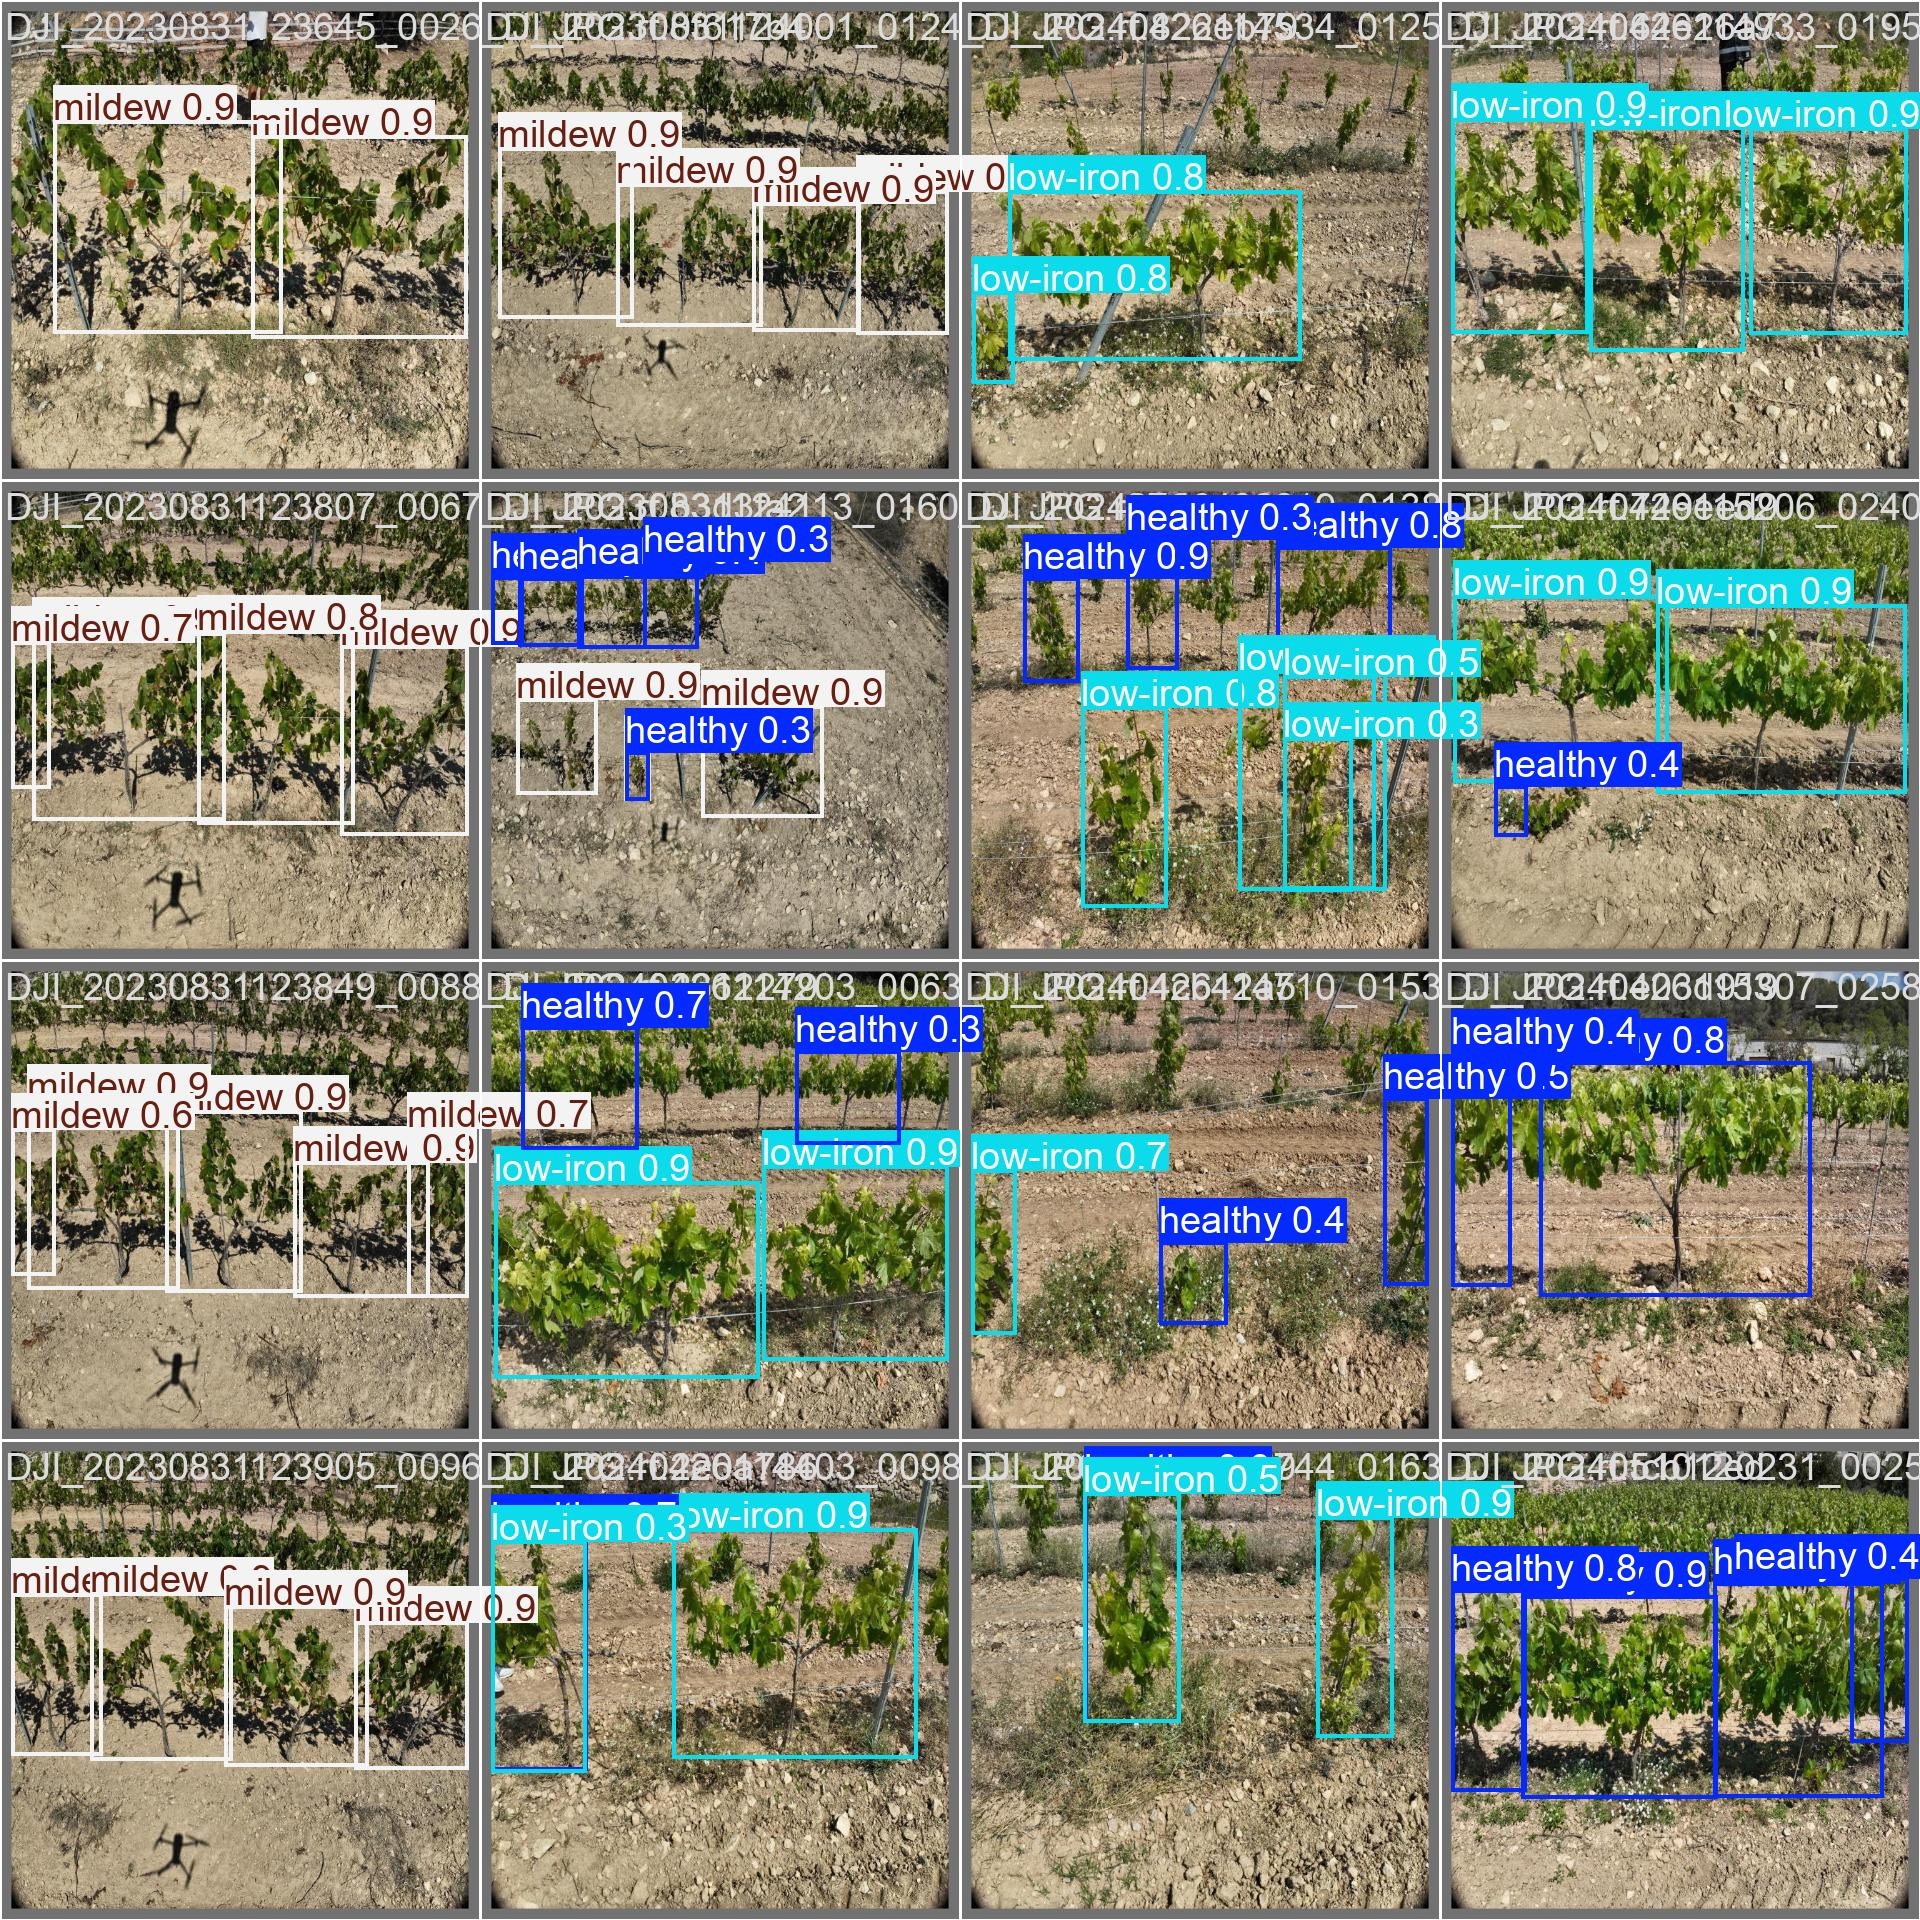



/content/runs/detect/val/val_batch2_labels.jpg


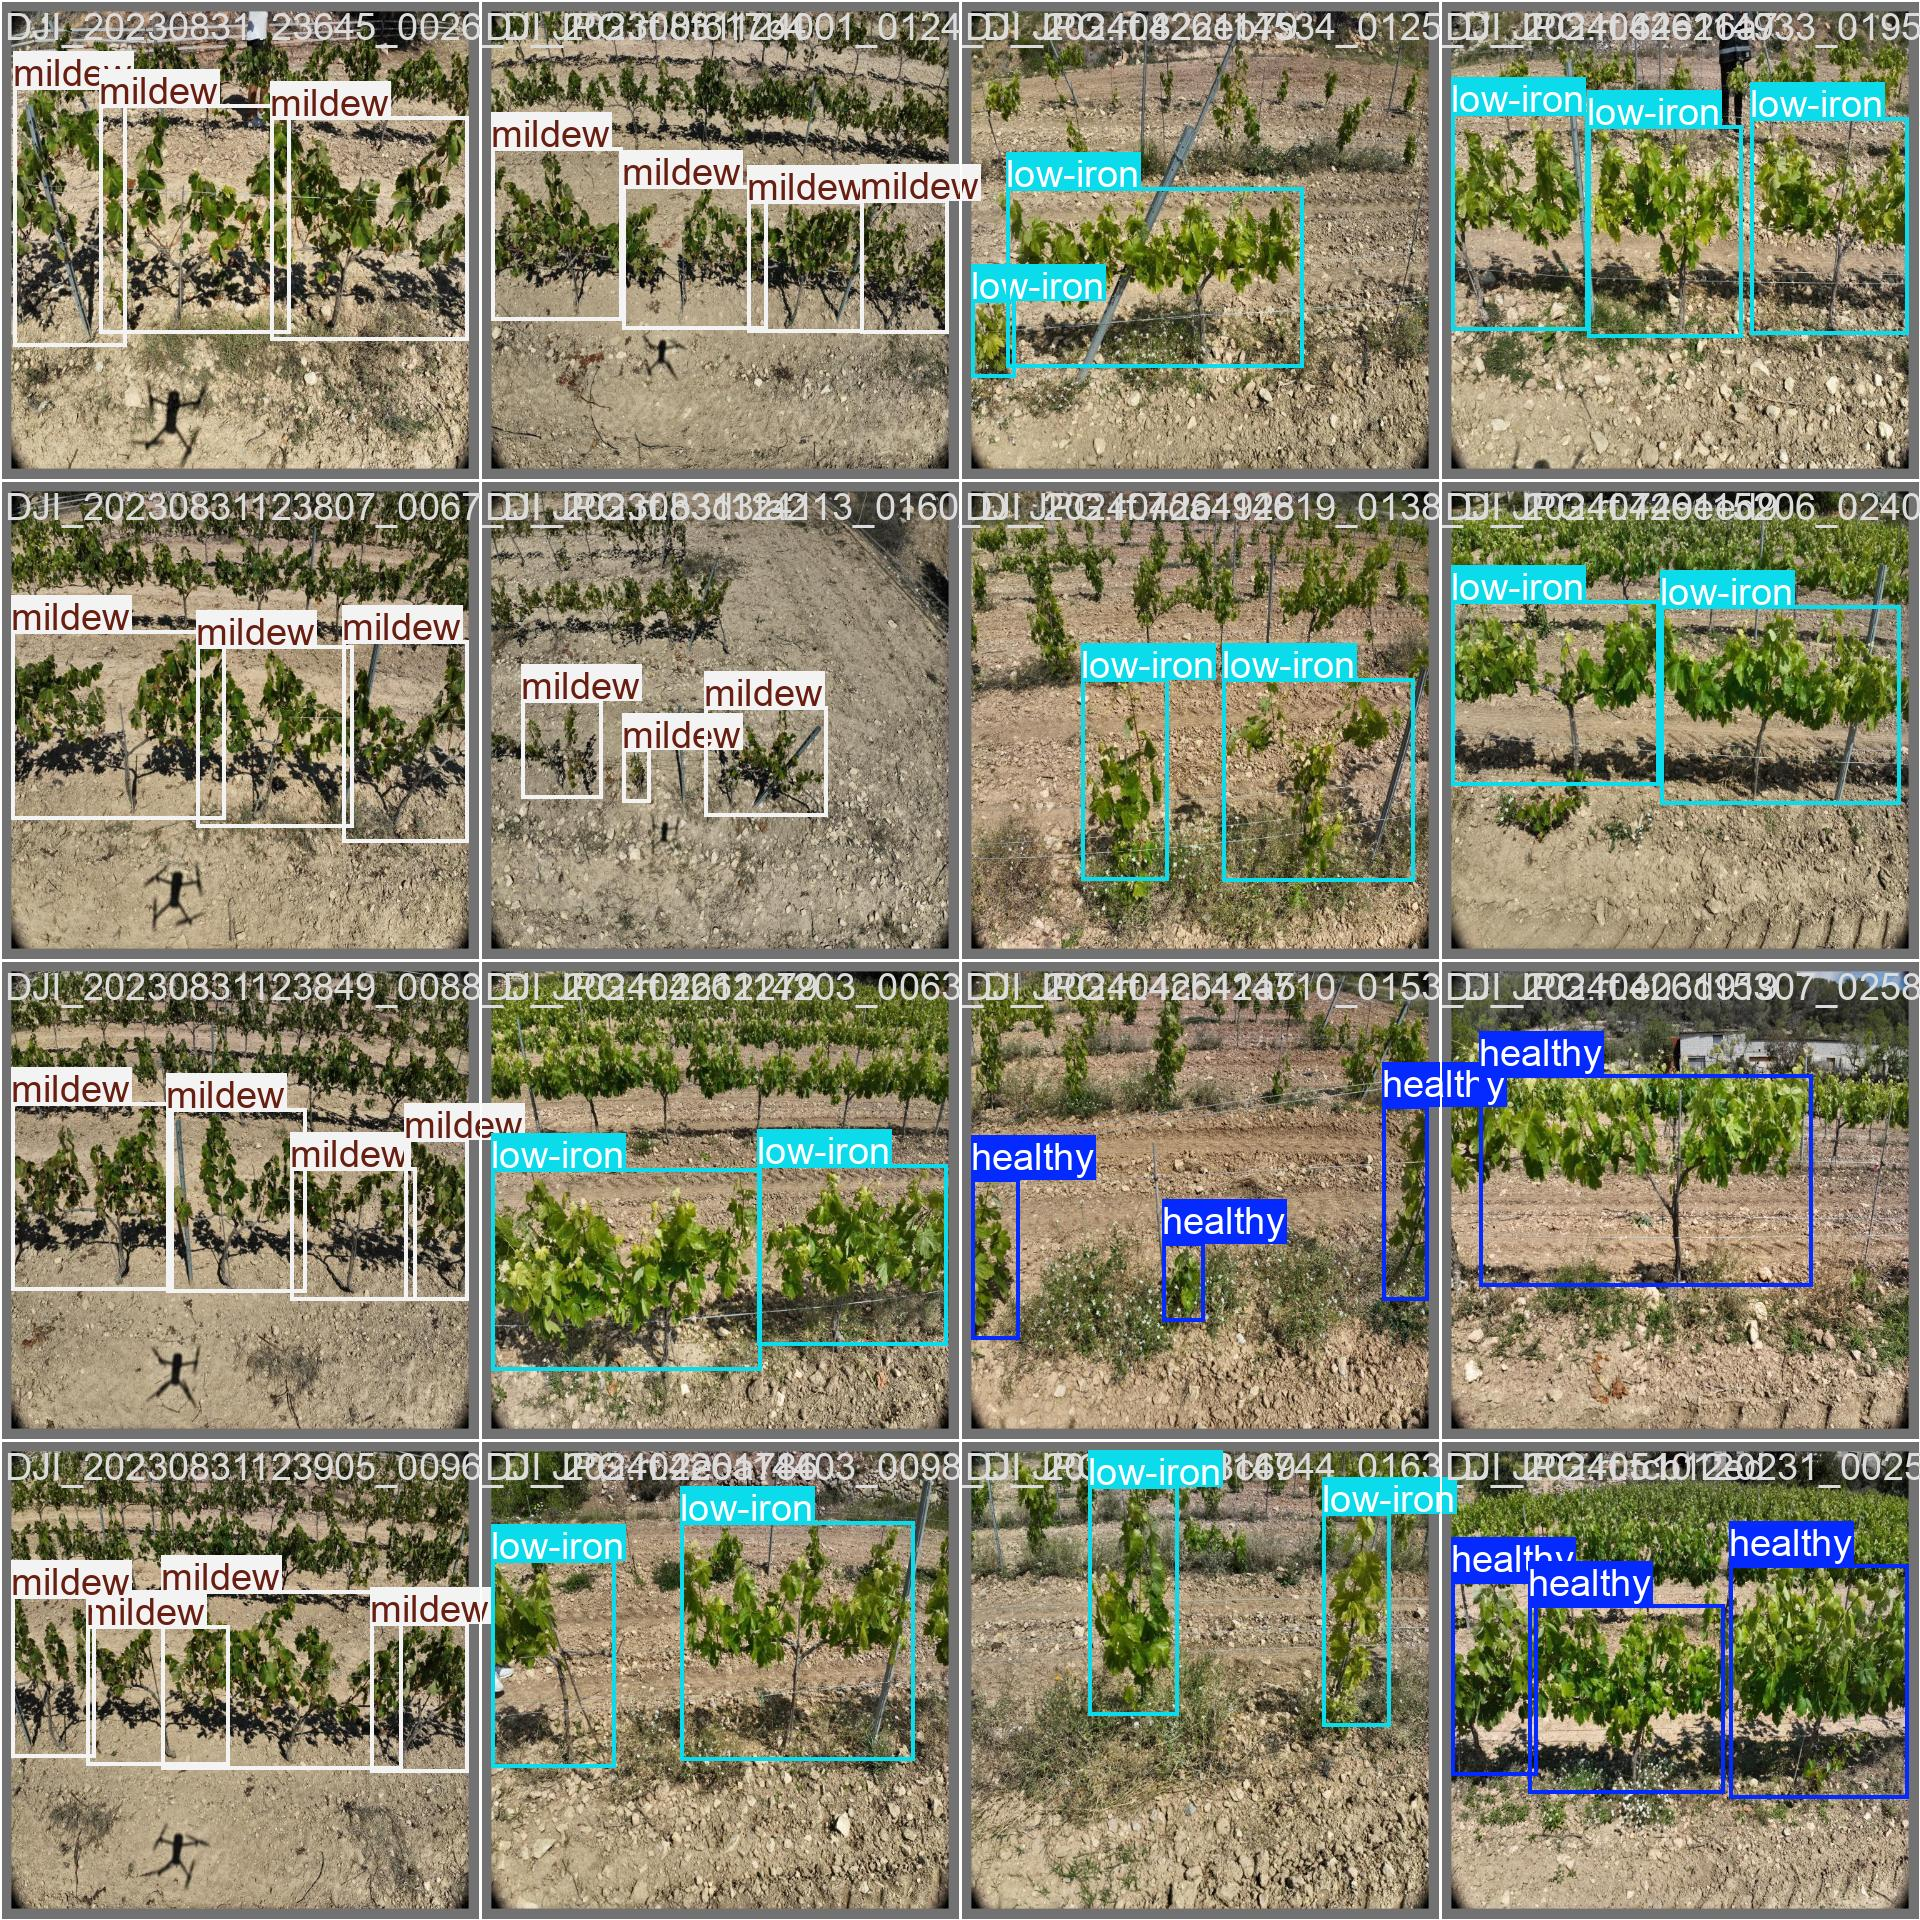



/content/runs/detect/val/val_batch0_pred.jpg


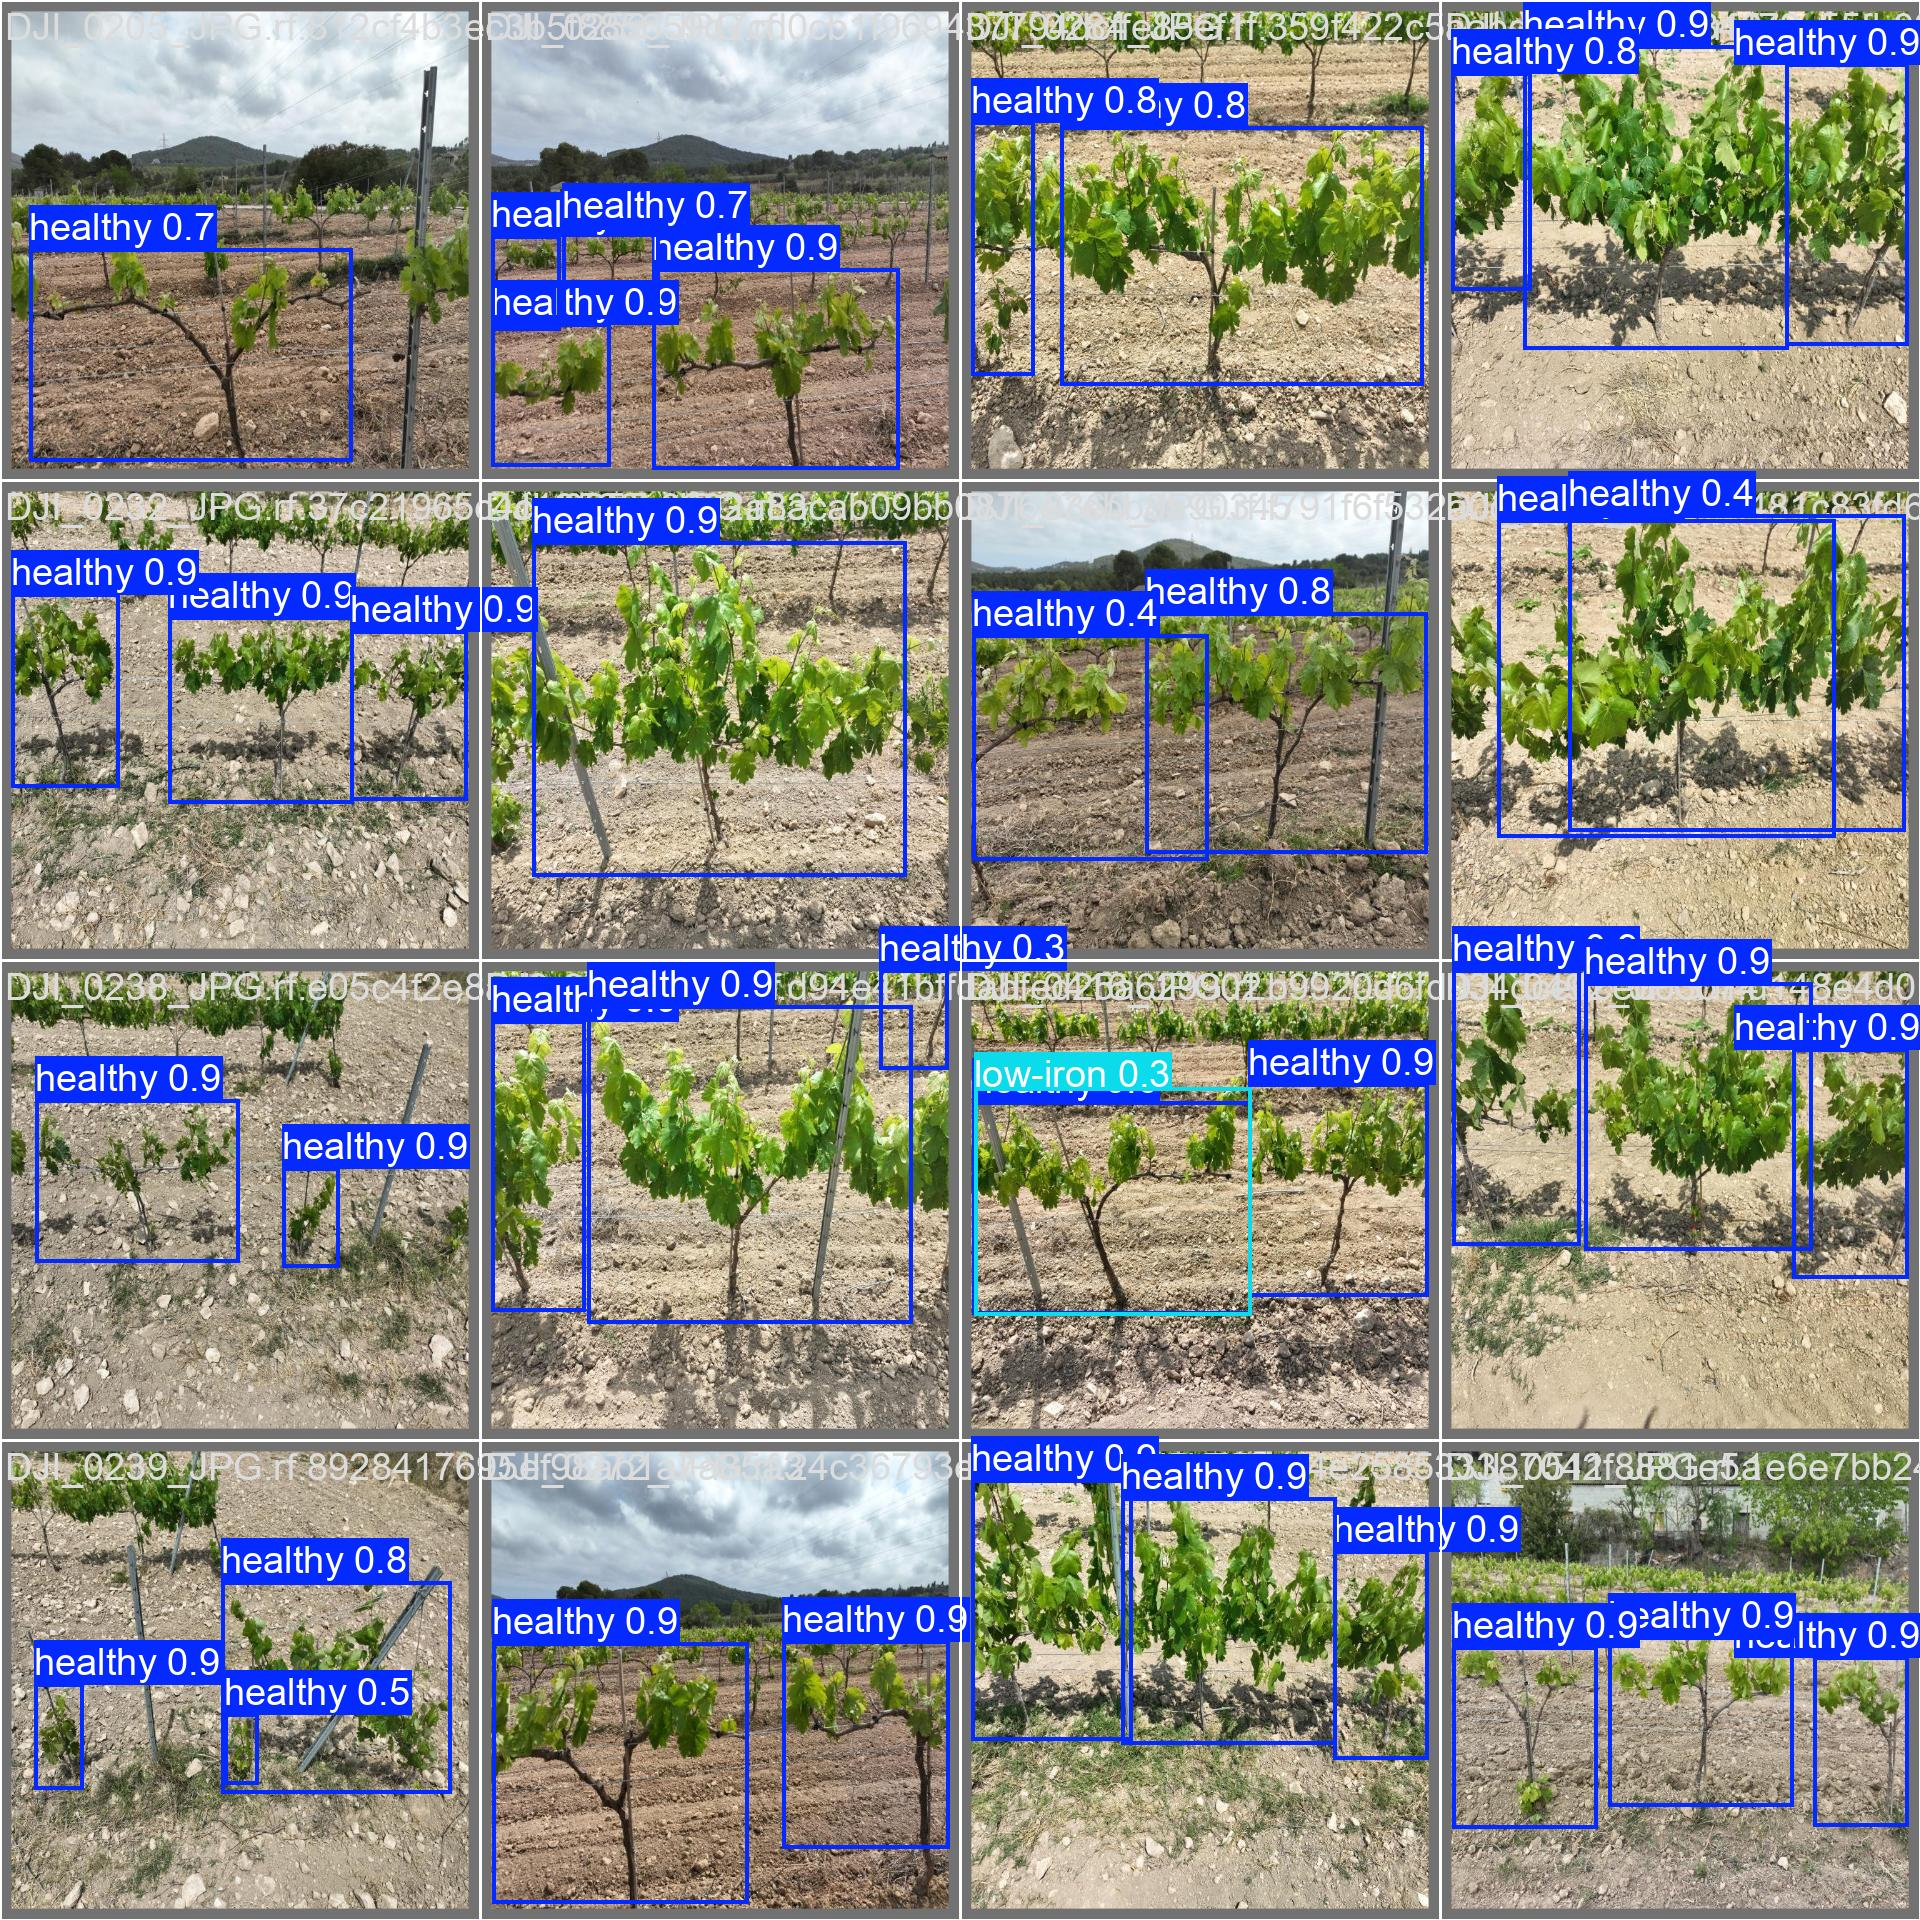

In [16]:
from IPython.display import Image, display

# Show test images with disease detection
for image_path in glob.glob(f'/content/runs/detect/val/*.jpg')[:3]:
    print(image_path)
    display(Image(filename=image_path, width=600))
    print("\n")


image 1/1 /content/drive/MyDrive/datasets3classes/test/images/DJI_0179_JPG.rf.03eec6f5bd7ed222a1fc1bb5ebd27095.jpg: 640x640 2 healthys, 20.1ms
Speed: 2.8ms preprocess, 20.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


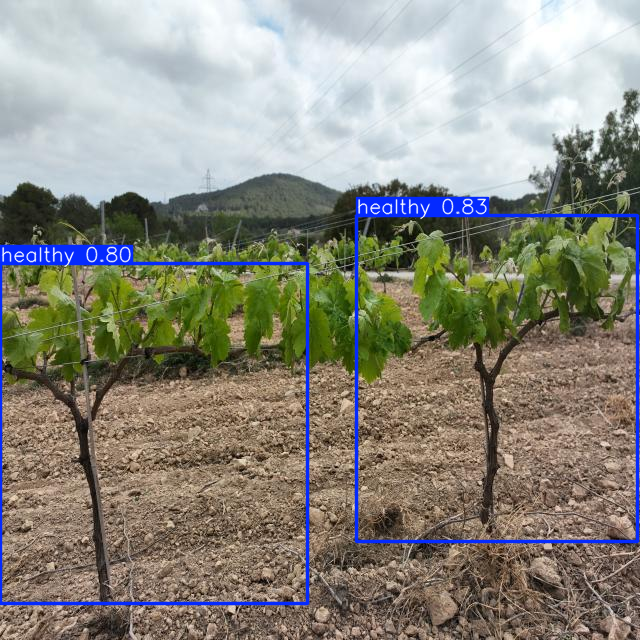

In [17]:
# Select image to inference
image_path = "/content/drive/MyDrive/datasets3classes/test/images/DJI_0179_JPG.rf.03eec6f5bd7ed222a1fc1bb5ebd27095.jpg"

# Predict
results = new_model(image_path)

#Show prediction
results[0].show()